# Lista 08 - Aprendizado de Máquina

## Aluno: Ruan Felipe de Almeida Silva - 397048

In [86]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')



### Questão 01 

In [87]:
dados = load_boston()
dataframe = pd.DataFrame(dados.data, columns=dados.feature_names)
dataframe.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [88]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=42)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 354
Conjunto x de teste: 152
Conjunto y de treino: 354
Conjunto y de teste: 152


In [89]:
colunas = dataframe.columns
colunas.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [90]:
results = []

#### a) Mostre os coeficientes para alpha=0.1 e normalize=True. Mostre também para normalize=False.


In [91]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso.predict(X_test)
print(f'Coeficientes: {lasso.coef_}')
print(f'Intercept: {lasso.intercept_}')

Coeficientes: [-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]
Intercept: 14.496827419617082


In [92]:
resultado = {'alpha': 0.1, 'normalize': True}
for key, value in zip(colunas.values, lasso.coef_):
    resultado[key] = value

results.append(resultado)

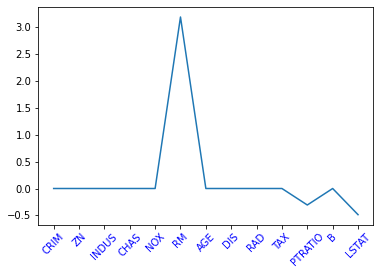

In [93]:
plt.plot(range(len(colunas)), lasso.coef_)
plt.xticks(range(len(colunas)), colunas.values, rotation=45, color='blue')
plt.show()

In [94]:
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(X_train, y_train)
lasso.predict(X_test)
print(f'Coeficientes: {lasso.coef_}')
print(f'Intercept: {lasso.intercept_}')

Coeficientes: [-1.22854422e-01  3.86385849e-02 -4.97188385e-04  1.48353759e+00
 -0.00000000e+00  3.89367421e+00 -1.96048179e-02 -1.10561397e+00
  2.16673479e-01 -1.05844004e-02 -7.44014516e-01  1.23959059e-02
 -6.02281637e-01]
Intercept: 22.664981803967585


In [95]:
resultado = {'alpha': 0.1, 'normalize': False}
for key, value in zip(colunas.values, lasso.coef_):
    resultado[key] = value

results.append(resultado)

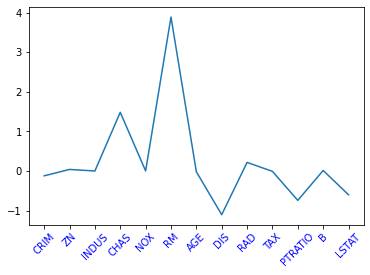

In [96]:
plt.plot(range(len(colunas)), lasso.coef_)
plt.xticks(range(len(colunas)), colunas.values, rotation=45, color='blue')
plt.show()

#### b) Mostre os coeficientes para alpha=0.4 e normalize=True. Mostre também para normalize=False.

In [97]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train, y_train)
lasso.predict(X_test)

print(f'Coeficientes: {lasso.coef_}')
print(f'Intercept: {lasso.intercept_}')

Coeficientes: [-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Intercept: 23.01581920903955


In [98]:
resultado = {'alpha': 0.4, 'normalize': True}
for key, value in zip(colunas.values, lasso.coef_):
    resultado[key] = value

results.append(resultado)

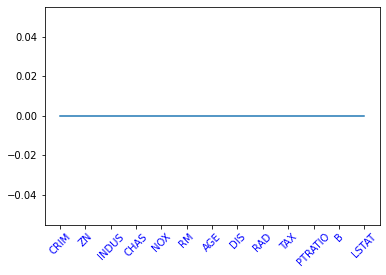

In [99]:
plt.plot(range(len(colunas)), lasso.coef_)
plt.xticks(range(len(colunas)), colunas.values, rotation=45, color='blue')
plt.show()

In [100]:
lasso = Lasso(alpha=0.4, normalize=False)
lasso.fit(X_train, y_train)
lasso.predict(X_test)

print(f'Coeficientes: {lasso.coef_}')
print(f'Intercept: {lasso.intercept_}')

Coeficientes: [-0.11576163  0.0382639  -0.          0.         -0.          3.02904787
 -0.00594293 -0.94591883  0.21832368 -0.0105426  -0.73995647  0.01213879
 -0.66980952]
Intercept: 27.50057861036703


In [101]:
resultado = {'alpha': 0.4, 'normalize': False}
for key, value in zip(colunas.values, lasso.coef_):
    resultado[key] = value

results.append(resultado)

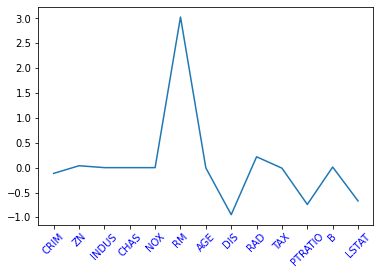

In [102]:
plt.plot(range(len(colunas)), lasso.coef_)
plt.xticks(range(len(colunas)), colunas.values, rotation=45, color='blue')
plt.show()

#### c) Houve feature(s) removida(s) em alguma configuração acima? Qual(is)?

**Resposta:** Sim. 

In [103]:
df_results = pd.DataFrame(results)
df_results

,alpha,normalize,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.1,True,-0.000000,0.000000,-0.000000,0.000000,-0.0,3.188529,-0.000000,-0.000000,-0.000000,-0.000000,-0.306690,0.000000,-0.486665
1,0.1,False,-0.122854,0.038639,-0.000497,1.483538,-0.0,3.893674,-0.019605,-1.105614,0.216673,-0.010584,-0.744015,0.012396,-0.602282
2,0.4,True,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
3,0.4,False,-0.115762,0.038264,-0.000000,0.000000,-0.0,3.029048,-0.005943,-0.945919,0.218324,-0.010543,-0.739956,0.012139,-0.669810


In [104]:
features = df_results[df_results == 0]
features['alpha'] = [0.1, 0.1, 0.4, 0.4]
features['normalize'] = [True, False, True, False]
features.fillna('-')

,alpha,normalize,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.1,True,-0.0,0.0,-0.0,0.0,-0.0,-,-0.0,-0.0,-0.0,-0.0,-,0.0,-
1,0.1,False,-,-,-,-,-0.0,-,-,-,-,-,-,-,-
2,0.4,True,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
3,0.4,False,-,-,-0.0,0.0,-0.0,-,-,-,-,-,-,-,-


### Questão 02

In [105]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=42)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 354
Conjunto x de teste: 152
Conjunto y de treino: 354
Conjunto y de teste: 152


#### a) Adapte o código acima para mostrar em um gráfico os scores ($R^2$) sobre o conjunto de teste para os seguintes valores de alpha: [1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]. Use normalize=True. Esses valores de alpha podem ser facilmente obtidos no numpy usando: valores_alpha = np.logspace(-4, 0, 5).

In [106]:
alpha_values = np.logspace(-4, 0, 5)
scores = []
results = []

for alpha in alpha_values: 
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    score = ridge.score(X_test, y_test)
    print(f'R^2: {score}')
    scores.append(score)

    resultado = {'alpha': alpha, 'normalize': True, 'Score R^2': score}
    results.append(resultado)

R^2: 0.7112111590981025
R^2: 0.7110775704734216
R^2: 0.7097594050919812
R^2: 0.6996938275127313
R^2: 0.6241064474736235


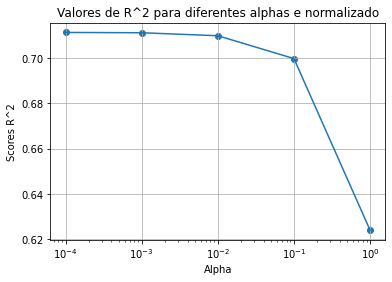

In [107]:
plt.plot(alpha_values, scores)
plt.ylabel('Scores R^2')
plt.xlabel('Alpha')
plt.title('Valores de R^2 para diferentes alphas e normalizado')
plt.scatter(alpha_values, scores)
plt.xscale('log')
plt.grid()
plt.show()


#### b) Mostre o mesmo para normalize=False.


In [108]:
alpha_values = np.logspace(-4, 0, 5)
scores = []

for alpha in alpha_values: 
    ridge = Ridge(alpha=alpha, normalize=False)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    score = ridge.score(X_test, y_test)
    print(f'R^2: {score}')
    scores.append(score)

    resultado = {'alpha': alpha, 'normalize': False, 'Score R^2': score}
    results.append(resultado)

R^2: 0.7112250981524468
R^2: 0.711216928951723
R^2: 0.7111351633163309
R^2: 0.7103178206391327
R^2: 0.7041586727559436


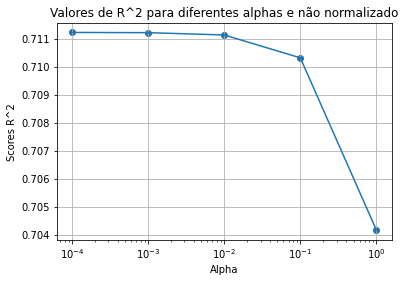

In [109]:
plt.plot(alpha_values, scores)
plt.ylabel('Scores R^2')
plt.xlabel('Alpha')
plt.title('Valores de R^2 para diferentes alphas e não normalizado')
plt.scatter(alpha_values, scores)
plt.xscale('log')
plt.grid()
plt.show()


#### c) Agora pegue os hiperparâmetros do melhor resultado que você obteve. Treine um novo modelo usando-os, mas mudando agora a quantidade de épocas (hiperparâmetro max_iter) para apenas 10 (o valor default é 1000). Qual o score R^2 sobre o conjunto de teste para o novo modelo?

In [110]:
df_result = pd.DataFrame(results);
df_result

,alpha,normalize,Score R^2
0,0.0001,True,0.711211
1,0.0010,True,0.711078
2,0.0100,True,0.709759
3,0.1000,True,0.699694
4,1.0000,True,0.624106
5,0.0001,False,0.711225
6,0.0010,False,0.711217
7,0.0100,False,0.711135
8,0.1000,False,0.710318
9,1.0000,False,0.704159


In [111]:
df_result_ordered = df_result.sort_values(by='Score R^2', ascending=False)
df_result_ordered

,alpha,normalize,Score R^2
5,0.0001,False,0.711225
6,0.0010,False,0.711217
0,0.0001,True,0.711211
7,0.0100,False,0.711135
1,0.0010,True,0.711078
8,0.1000,False,0.710318
2,0.0100,True,0.709759
9,1.0000,False,0.704159
3,0.1000,True,0.699694
4,1.0000,True,0.624106


In [112]:
best_params = df_result_ordered.iloc[0, :-1]
best_params

alpha        0.0001
normalize     False
Name: 5, dtype: object

In [113]:
ridge = Ridge(alpha=best_params['alpha'], normalize=best_params['normalize'], max_iter=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
score = ridge.score(X_test, y_test)
print(f'Score R^2: {score}')

Score R^2: 0.7112250981524468


### Questão 03 - Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database (link alternativo no Kaggle)". 


In [114]:
dataframe = pd.read_csv('diabetes.csv', delimiter=',')
dataframe.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [115]:
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
X_values = X.values
y_values = y.values

colunas = X.columns
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_values, y_values, test_size=0.2, random_state=42, stratify=y_values)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 614
Conjunto x de teste: 154
Conjunto y de treino: 614
Conjunto y de teste: 154


In [116]:
reglog_none = LogisticRegression(penalty='none')
reglog_l1 = LogisticRegression(penalty='l1', solver='liblinear')
reglog_l2 = LogisticRegression(penalty='l2')
reglog_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

reglog_none.fit(X_train, y_train)
reglog_l1.fit(X_train, y_train)
reglog_l2.fit(X_train, y_train)
reglog_elasticnet.fit(X_train, y_train);

y_pred_none = reglog_none.predict(X_test)
y_pred_l1 = reglog_l1.predict(X_test)
y_pred_l2 = reglog_l2.predict(X_test)
y_pred_elasticnet = reglog_elasticnet.predict(X_test)


Coeficientes L1: [[ 0.1104686   0.03504767 -0.0120735   0.00422562 -0.00105381  0.08456357
   0.63062859  0.01381187]]


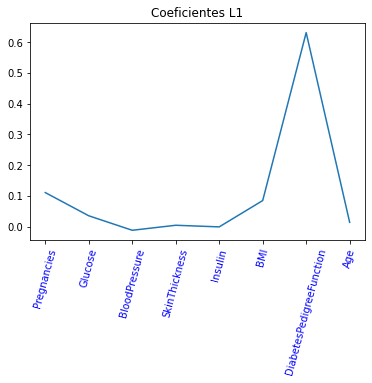

In [117]:
print(f'Coeficientes L1: {reglog_l1.coef_}')
plt.plot(range(len(colunas)), reglog_l1.coef_[0])
plt.xticks(range(len(colunas)), colunas.values, rotation=75, color='blue')
plt.title('Coeficientes L1')
plt.show()

Nenhuma feature foi descartada utilizando a regularização L1.

In [118]:
print(f'Coeficientes None: {reglog_none.coef_}')
print(f'Coeficientes L2: {reglog_l2.coef_}')

Coeficientes None: [[ 0.11725862  0.03684541 -0.01115462  0.00479184 -0.00129745  0.09197622
   0.81382579  0.01545534]]
Coeficientes L2: [[ 0.11663599  0.0375147  -0.01051515  0.00472683 -0.00134122  0.090329
   0.85525935  0.01425726]]


In [119]:
dicionario = {}
dicionario['Feature'] = colunas
dicionario['None'] = reglog_none.coef_[0]
dicionario['L2'] = reglog_l2.coef_[0]

df = pd.DataFrame(dicionario)
df

,Feature,None,L2
0,Pregnancies,0.117259,0.116636
1,Glucose,0.036845,0.037515
2,BloodPressure,-0.011155,-0.010515
3,SkinThickness,0.004792,0.004727
4,Insulin,-0.001297,-0.001341
5,BMI,0.091976,0.090329
6,DiabetesPedigreeFunction,0.813826,0.855259
7,Age,0.015455,0.014257


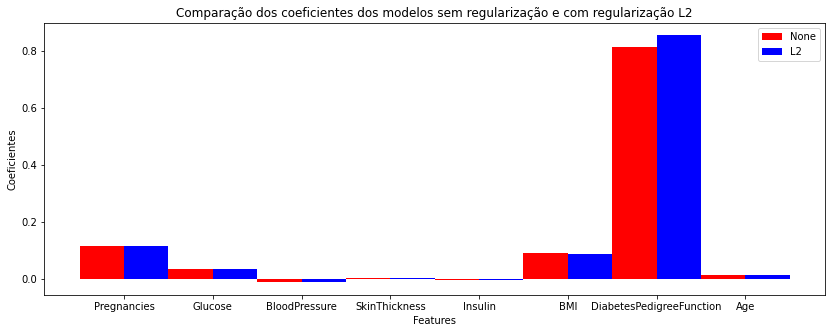

In [81]:
plt.figure(figsize = (14, 5))

barWidth = 0.5

p1 = np.arange(len(reglog_none.coef_[0]))
p2 = [p + barWidth for p in p1]


plt.bar(p1, reglog_none.coef_[0], color='red', width=barWidth, label='None')
plt.bar(p2, reglog_l2.coef_[0], color='blue', width=barWidth, label='L2')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Coeficientes')
plt.title('Comparação dos coeficientes dos modelos sem regularização e com regularização L2')
plt.xticks((p1+p2)/2, colunas)
plt.show()

In [82]:
alpha_values = np.logspace(-7, 7, 15)
results = []
for alpha in alpha_values:
    reglog_none = LogisticRegression(C = 1/alpha, penalty='none')
    reglog_l1 = LogisticRegression(C = 1/alpha, penalty='l1', solver='liblinear')
    reglog_l2 = LogisticRegression(C = 1/alpha, penalty='l2')
    reglog_elasticnet = LogisticRegression(C = 1/alpha, penalty='elasticnet', solver='saga', l1_ratio=0.5)

    reglog_none.fit(X_train, y_train)
    reglog_l1.fit(X_train, y_train)
    reglog_l2.fit(X_train, y_train)
    reglog_elasticnet.fit(X_train, y_train);

    y_pred_none = reglog_none.predict(X_test)
    y_pred_l1 = reglog_l1.predict(X_test)
    y_pred_l2 = reglog_l2.predict(X_test)
    y_pred_elasticnet = reglog_elasticnet.predict(X_test)

    
    accuracy_none = metrics.accuracy_score(y_test, y_pred_none)
    accuracy_l1 = metrics.accuracy_score(y_test, y_pred_l1)
    accuracy_l2 = metrics.accuracy_score(y_test, y_pred_l2)
    accuracy_elasticnet = metrics.accuracy_score(y_test, y_pred_elasticnet)
    
    resultado = {'Regularização': 'none', 'Alpha': alpha, 'Acurácia':accuracy_none}
    results.append(resultado)
    resultado = {'Regularização': 'l1', 'Alpha': alpha, 'Acurácia':accuracy_l1}
    results.append(resultado)
    resultado = {'Regularização': 'l2', 'Alpha': alpha, 'Acurácia':accuracy_l2}
    results.append(resultado)
    resultado = {'Regularização': 'elasticnet', 'Alpha': alpha, 'Acurácia':accuracy_elasticnet}
    results.append(resultado)


In [83]:
df_results = pd.DataFrame(results)
df_results

,Regularização,Alpha,Acurácia
0,none,1.000000e-07,0.714286
1,l1,1.000000e-07,0.714286
2,l2,1.000000e-07,0.714286
3,elasticnet,1.000000e-07,0.655844
4,none,1.000000e-06,0.714286
5,l1,1.000000e-06,0.714286
6,l2,1.000000e-06,0.714286
7,elasticnet,1.000000e-06,0.655844
8,none,1.000000e-05,0.714286
9,l1,1.000000e-05,0.714286


In [84]:
df_result_ordered = df_results.sort_values(by='Acurácia', ascending=False)
df_result_ordered

,Regularização,Alpha,Acurácia
46,l2,1.000000e+04,0.727273
42,l2,1.000000e+03,0.727273
34,l2,1.000000e+01,0.720779
0,none,1.000000e-07,0.714286
32,none,1.000000e+01,0.714286
22,l2,1.000000e-02,0.714286
24,none,1.000000e-01,0.714286
25,l1,1.000000e-01,0.714286
26,l2,1.000000e-01,0.714286
28,none,1.000000e+00,0.714286


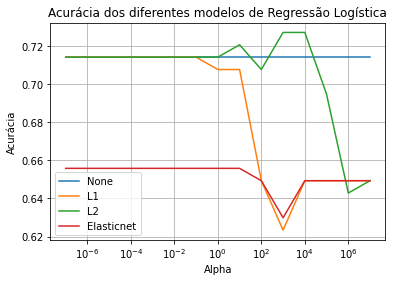

In [85]:
accuracy_none = df_results.loc[(df_results['Regularização']) == 'none', 'Acurácia']
accuracy_l1 = df_results.loc[(df_results['Regularização']) == 'l1', 'Acurácia']
accuracy_l2 = df_results.loc[(df_results['Regularização']) == 'l2', 'Acurácia']
accuracy_elasticnet = df_results.loc[(df_results['Regularização']) == 'elasticnet', 'Acurácia']

plt.plot(alpha_values, accuracy_none, label='None')
plt.plot(alpha_values, accuracy_l1, label='L1')
plt.plot(alpha_values, accuracy_l2, label='L2')
plt.plot(alpha_values, accuracy_elasticnet, label='Elasticnet')
plt.ylabel('Acurácia')
plt.xlabel('Alpha')
plt.title('Acurácia dos diferentes modelos de Regressão Logística')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()
